In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [14]:
train_dir = 'training_data'
val_dir = 'validation'
test_dir = 'test'

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 10661 images belonging to 2 classes.
Found 1867 images belonging to 2 classes.
Found 1867 images belonging to 1 classes.


In [16]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/20
333/333 [==============================] - 157s 470ms/step - loss: 0.4635 - accuracy: 0.7985 - val_loss: 0.7565 - val_accuracy: 0.6988
Epoch 2/20
333/333 [==============================] - 155s 467ms/step - loss: 0.4426 - accuracy: 0.8102 - val_loss: 0.7003 - val_accuracy: 0.7069
Epoch 3/20
333/333 [==============================] - 156s 469ms/step - loss: 0.4056 - accuracy: 0.8304 - val_loss: 0.6515 - val_accuracy: 0.6783
Epoch 4/20
333/333 [==============================] - 156s 469ms/step - loss: 0.3792 - accuracy: 0.8402 - val_loss: 0.7125 - val_accuracy: 0.7107
Epoch 5/20
333/333 [==============================] - 156s 468ms/step - loss: 0.3459 - accuracy: 0.8548 - val_loss: 0.7158 - val_accuracy: 0.6950
Epoch 6/20
333/333 [==============================] - 158s 475ms/step - loss: 0.3135 - accuracy: 0.8661 - val_loss: 0.8595 - val_accuracy: 0.6999
Epoch 7/20
333/333 [==============================] - 157s 472ms/step - loss: 0.2834 - accuracy: 0.8808 - val_loss: 0.7842 -

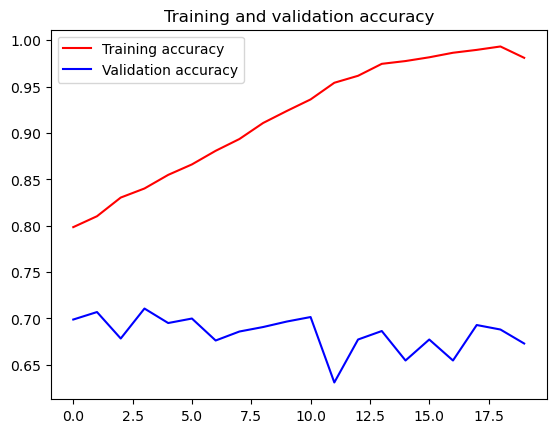

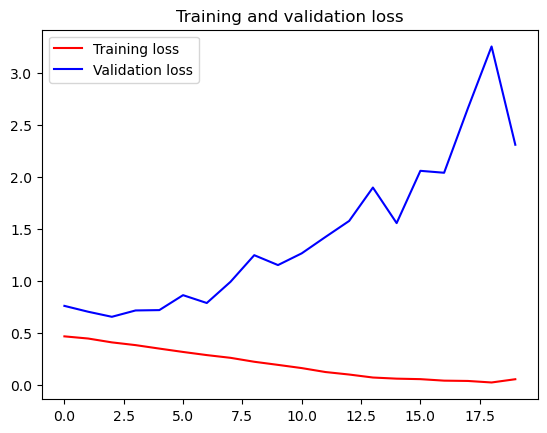

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
# Testing the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")


59/59 [==============================] - 7s 125ms/step - loss: 1.3320 - accuracy: 0.7375
Test Accuracy: 0.7375468611717224


In [49]:
def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction < 0.5:
        print("The image is classified as Normal")
    else:
        print("The image is classified as Cancer")

In [50]:
example_cancer_image_path = '/validation/cancer/2.bmp'
example_normal_image_path = '/validation/normal/7.bmp'

In [84]:
predict_image('validation/cancer/458.bmp', model)
predict_image('validation/normal/7.bmp', model)

1/1 [==============================] - 0s 18ms/step
The image is classified as Normal
1/1 [==============================] - 0s 17ms/step
The image is classified as Normal


In [91]:
model.save('leukemia_cnn_model.h5')

/home/santhu/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
